In [1]:
from getpass import getpass
import os

# Prompt for GitHub Personal Access Token (PAT)
token = getpass('Enter your GitHub token: ')

repo_url = 'https://github.com/Jerry086/SALSA.git'

# clone private repo with PAT
os.system(f'git clone https://{token}@{repo_url[8:]}')

Enter your GitHub token: ··········


0

In [2]:
# copy csv to current directory
!cp SALSA/dataset/* .

In [3]:
!ls

class_labels_indices.csv  sample_data		   training_metadata.csv
SALSA			  training_embeddings.csv  training_metadata_rootclass.csv


In [4]:
import numpy as np
import pandas as pd

In [5]:
metadata_df = pd.read_csv('training_metadata_rootclass.csv')
# Preprocessing the labels in metadata to ensure they are list objects and not strings
metadata_df['labels'] = metadata_df['labels'].apply(eval)
metadata_df

,video_id,start_time_seconds,end_time_seconds,labels
0,wqoOX8K8DEU,30.0,40.0,[388]
1,wqH6Sj_h948,120.0,130.0,"[0, 441]"
2,wq1098my4zA,130.0,140.0,"[137, 27, 271]"
3,wqR7LHho-WE,10.0,20.0,"[0, 25, 22]"
4,wq6Me-UUbSc,360.0,370.0,[404]
...,...,...,...,...
21777,2w6tV5kDGWo,240.0,250.0,[137]
21778,2wZCoeq9Ppc,80.0,90.0,"[137, 268]"
21779,2wajg-UP-Gs,0.0,10.0,[458]
21780,lZavPVn7O4Q,180.0,190.0,"[137, 258, 260, 273]"


In [6]:
embeddings_df = pd.read_csv('training_embeddings.csv')
embeddings_df

,video_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,wqoOX8K8DEU,89,255,19,54,240,199,213,188,255,...,101,152,255,0,194,190,0,91,247,251
1,wqH6Sj_h948,89,74,221,113,99,254,42,97,135,...,98,38,255,0,255,255,124,29,0,255
2,wq1098my4zA,224,124,142,123,113,144,189,206,64,...,72,116,62,197,89,51,212,44,112,177
3,wqR7LHho-WE,147,207,173,147,216,98,144,0,218,...,86,81,91,123,192,51,255,255,101,0
4,wq6Me-UUbSc,70,90,168,90,220,90,130,61,129,...,91,184,83,32,131,167,167,111,180,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2w6tV5kDGWo,155,99,141,33,81,109,108,237,176,...,217,196,195,104,81,0,47,194,56,196
21778,2wZCoeq9Ppc,102,255,136,0,0,95,255,255,255,...,80,0,233,146,255,200,0,0,0,96
21779,2wajg-UP-Gs,132,72,60,190,75,6,114,73,153,...,255,156,156,35,255,0,0,255,255,0
21780,lZavPVn7O4Q,224,112,85,133,151,193,112,127,154,...,127,207,66,83,106,204,154,74,145,62


In [7]:
# Merge DataFrames on 'video_id'
merged_df = pd.merge(metadata_df, embeddings_df, on="video_id")
merged_df

,video_id,start_time_seconds,end_time_seconds,labels,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,wqoOX8K8DEU,30.0,40.0,[388],89,255,19,54,240,199,...,101,152,255,0,194,190,0,91,247,251
1,wqH6Sj_h948,120.0,130.0,"[0, 441]",89,74,221,113,99,254,...,98,38,255,0,255,255,124,29,0,255
2,wq1098my4zA,130.0,140.0,"[137, 27, 271]",224,124,142,123,113,144,...,72,116,62,197,89,51,212,44,112,177
3,wqR7LHho-WE,10.0,20.0,"[0, 25, 22]",147,207,173,147,216,98,...,86,81,91,123,192,51,255,255,101,0
4,wq6Me-UUbSc,360.0,370.0,[404],70,90,168,90,220,90,...,91,184,83,32,131,167,167,111,180,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2w6tV5kDGWo,240.0,250.0,[137],155,99,141,33,81,109,...,217,196,195,104,81,0,47,194,56,196
21778,2wZCoeq9Ppc,80.0,90.0,"[137, 268]",102,255,136,0,0,95,...,80,0,233,146,255,200,0,0,0,96
21779,2wajg-UP-Gs,0.0,10.0,[458],132,72,60,190,75,6,...,255,156,156,35,255,0,0,255,255,0
21780,lZavPVn7O4Q,180.0,190.0,"[137, 258, 260, 273]",224,112,85,133,151,193,...,127,207,66,83,106,204,154,74,145,62


In [11]:
# Separate the embeddings (features) and labels for training
features = merged_df.drop(columns=['video_id', 'start_time_seconds', 'end_time_seconds', 'labels']).values
labels = merged_df['labels'].values
video_ids = merged_df['video_id'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree

# Split the dataset into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Build a KDTree for the training embeddings
kd_tree = KDTree(features_train, leaf_size=40, metric='euclidean')

# query the KDTree
distances, indices = kd_tree.query(features_test, k=10)

# get labels of results
labels_results = labels_train[indices]

In [ ]:
# calculate precision@K
def cal_precisionK(query, neighbors):
  query_labels = set(query)
  relevant_cnt = 0
  for neigh in neighbors:
    neighbor_labels = set(neigh)
    if not query_labels.isdisjoint(neighbor_labels):
      relevant_cnt += 1
  return relevant_cnt / len(neighbors)

In [ ]:
# calculate overall precision@K
sum = 0
for query, neighbors in zip(labels_test, labels_results):
  precision = cal_precisionK(query, neighbors)
  sum += precision
precision_at_10 = sum / len(labels_test)
print("Precision@10 before PCA: ", precision_at_10)

Precision@10 before PCA:  0.39284075263882584


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree

# List of percentages for dimensionality reduction
percentages = [0.1, 0.3, 0.5, 0.7, 0.9]
precision_pca = {}

for percentage in percentages:
  n_components = int(len(features[0]) * percentage)
  pca = PCA(n_components=n_components)

  # Fit PCA on the training data and transform both training and testing data
  features_train_pca = pca.fit_transform(features_train)
  features_test_pca = pca.transform(features_test)

  kd_tree = KDTree(features_train_pca, leaf_size=40, metric='euclidean')
  distances, indices = kd_tree.query(features_test_pca, k=10)
  labels_results = labels_train[indices]

  sum = 0
  for query, neighbors in zip(labels_test, labels_results):
    precision = cal_precisionK(query, neighbors)
    sum += precision
  precision_at_10 = sum / len(labels_test)
  precision_pca[percentage] = precision_at_10

In [ ]:
for percent, precision in precision_pca.items():
  print(f"Precision@10 with {percent * 100}% remaining features: ", precision)

Precision@10 with 10.0% remaining features:  0.5620009178522245
Precision@10 with 30.0% remaining features:  0.5233593391463972
Precision@10 with 50.0% remaining features:  0.46305644791188705
Precision@10 with 70.0% remaining features:  0.42019274896741693
Precision@10 with 90.0% remaining features:  0.39889857732905026


In [ ]:
# Investigate less dimensions
percentages = [0.02, 0.04, 0.06, 0.08]

for percentage in percentages:
  n_components = int(len(features[0]) * percentage)
  pca = PCA(n_components=n_components)

  # Fit PCA on the training data and transform both training and testing data
  features_train_pca = pca.fit_transform(features_train)
  features_test_pca = pca.transform(features_test)

  kd_tree = KDTree(features_train_pca, leaf_size=40, metric='euclidean')
  distances, indices = kd_tree.query(features_test_pca, k=10)
  labels_results = labels_train[indices]

  sum = 0
  for query, neighbors in zip(labels_test, labels_results):
    precision = cal_precisionK(query, neighbors)
    sum += precision
  precision_at_10 = sum / len(labels_test)
  precision_pca[percentage] = precision_at_10

In [ ]:
for percent, precision in precision_pca.items():
  print(f"Precision@10 with {percent * 100}% remaining features: ", precision)

Precision@10 with 10.0% remaining features:  0.5620009178522245
Precision@10 with 30.0% remaining features:  0.5233593391463972
Precision@10 with 50.0% remaining features:  0.46305644791188705
Precision@10 with 70.0% remaining features:  0.42019274896741693
Precision@10 with 90.0% remaining features:  0.39889857732905026
Precision@10 with 2.0% remaining features:  0.5536943552088117
Precision@10 with 4.0% remaining features:  0.5613584212941705
Precision@10 with 6.0% remaining features:  0.5631482331344648
Precision@10 with 8.0% remaining features:  0.5623680587425411


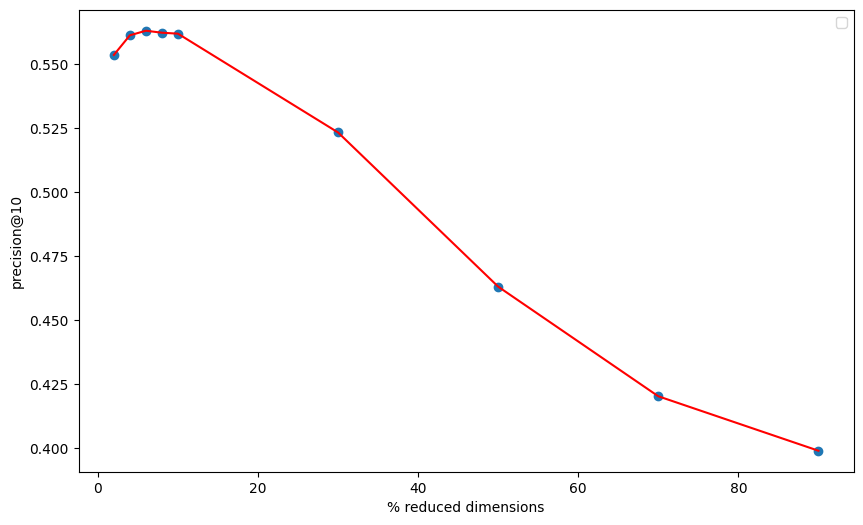

In [ ]:
import matplotlib.pyplot as plt

keys_sorted = sorted(precision_pca.keys())
values_sorted = [precision_pca[key] for key in keys_sorted]

x = np.array(keys_sorted) * 100
y = np.array(values_sorted)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y, color='red')
plt.xlabel('% reduced dimensions')
plt.ylabel('precision@10')
plt.legend()
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree

dimension = 128
pca = PCA(n_components=dimension)

# Fit PCA on the training data and transform both training and testing data
features_pca = pca.fit_transform(features)
features_pca.shape

(21782, 128)

In [12]:
features_pca_df = pd.DataFrame(features_pca)
features_pca_df.insert(0, 'video_id', video_ids)
features_pca_df

,video_id,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,wqoOX8K8DEU,-400.109260,-257.628675,-777.372164,-429.732838,621.198216,1010.863520,-740.583021,-823.286543,756.070759,...,-5.900869,17.375066,99.691431,-102.292165,66.364796,-80.286388,9.450293,73.487642,-110.601367,11.380997
1,wqH6Sj_h948,309.743991,364.795850,316.434703,-371.238257,-22.975099,-83.556422,-41.923027,76.683524,57.180570,...,10.775449,150.853976,110.909377,122.079984,-105.817719,54.137357,-15.539122,-9.302987,39.779985,-71.267268
2,wq1098my4zA,-3.724927,-193.261449,-17.087173,26.256569,-404.693084,-141.886639,269.344193,58.480854,-80.268385,...,86.424756,-33.846825,14.611483,-25.802075,-97.903874,-173.243493,35.553446,-100.313310,-49.678220,-7.799251
3,wqR7LHho-WE,-418.146599,267.529262,-541.747968,-51.991742,-55.635861,28.132081,-271.842801,-40.179547,105.100204,...,-38.855125,151.780249,-32.800451,-23.925573,175.564882,21.768738,-136.050821,-14.515413,99.665047,-23.902176
4,wq6Me-UUbSc,379.515666,-52.399000,231.587451,-466.958225,-173.884894,175.311860,-297.646045,-388.664204,-139.089319,...,-37.760027,-42.505700,-59.882969,74.903153,-79.236462,35.281720,8.187346,27.899158,-48.208623,-16.929791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2w6tV5kDGWo,-278.272520,-135.420555,-160.300365,279.512398,211.721292,9.691480,267.252515,293.082245,256.616713,...,-10.694947,40.897360,74.729487,-139.661727,219.048316,17.298801,-294.274324,34.531652,-213.691394,156.890210
21778,2wZCoeq9Ppc,-542.904607,-120.449937,-166.862126,190.139568,573.741848,300.358090,147.170225,-591.859061,401.577402,...,314.729477,81.256518,19.561297,125.557357,-8.983319,-181.315607,-234.570156,-45.757992,238.502280,172.396681
21779,2wajg-UP-Gs,-288.657092,-100.138103,118.244063,-119.342686,103.193825,-63.302329,-284.782229,139.615884,3.247217,...,26.585970,-68.645850,-23.018849,-83.977738,-71.372993,-28.418992,109.285442,35.489296,-113.680845,153.604656
21780,lZavPVn7O4Q,-134.415737,-60.303461,-44.512551,-62.570279,-269.720770,-16.318829,262.626449,-121.819326,-25.775420,...,163.201576,-45.260604,-72.487915,-40.781930,-193.022881,-26.643103,23.292939,44.642550,-33.148183,8.248720


In [15]:
import joblib
joblib.dump(pca, 'pca_model.pkl')
features_pca_df.to_csv('training_reduced_embeddings.csv', index=False)

In [16]:
from google.colab import files


files.download('/content/pca_model.pkl')
files.download('/content/training_reduced_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>